In [1]:
import pathlib

import matplotlib.pyplot as plt

from dataset import Dataset, Entry

In [2]:
df = Dataset(csv_file_path=pathlib.Path('data', 'daylio_export_2024_05_16.csv'), remove=True)

Dataset(1027 entries; last [2 months 9 days 23 hours 54 minutes 51 seconds ago]; mood: 3.800 ± 0.547)


In [3]:
ENTRIES = df.entries
OVERALL_AVERAGE = df.mood()
ACTIVITIES = {}
IMPORTANCE = []
weights = []

for i, ca in enumerate(df.complete_analysis(n_threshold=0)):
    ACTIVITIES[ca.activity] = i
    IMPORTANCE.append(ca.num_of_occurances)
    weights.append(ca.mood_with_without.calc_change())

IMPORTANCE_NORMALIZED = [i / sum(IMPORTANCE) for i in IMPORTANCE]

In [4]:
import math


def calc_loss(weights: list[float]) -> float:
    # without importance
    s = 0
    for entry in ENTRIES:
        s += (entry.mood - (
            OVERALL_AVERAGE * math.prod((1 + weights[ACTIVITIES[act]]) for act in entry.activities)
        ))**2
    return s / len(ENTRIES)

In [5]:
def show_effects(weights: list[float]) -> None:
    for activity, weight in zip(ACTIVITIES, weights):
        print(f'{activity}: {weight:.2%}')

In [6]:
# init loss
calc_loss(weights)

0.9680104046317758

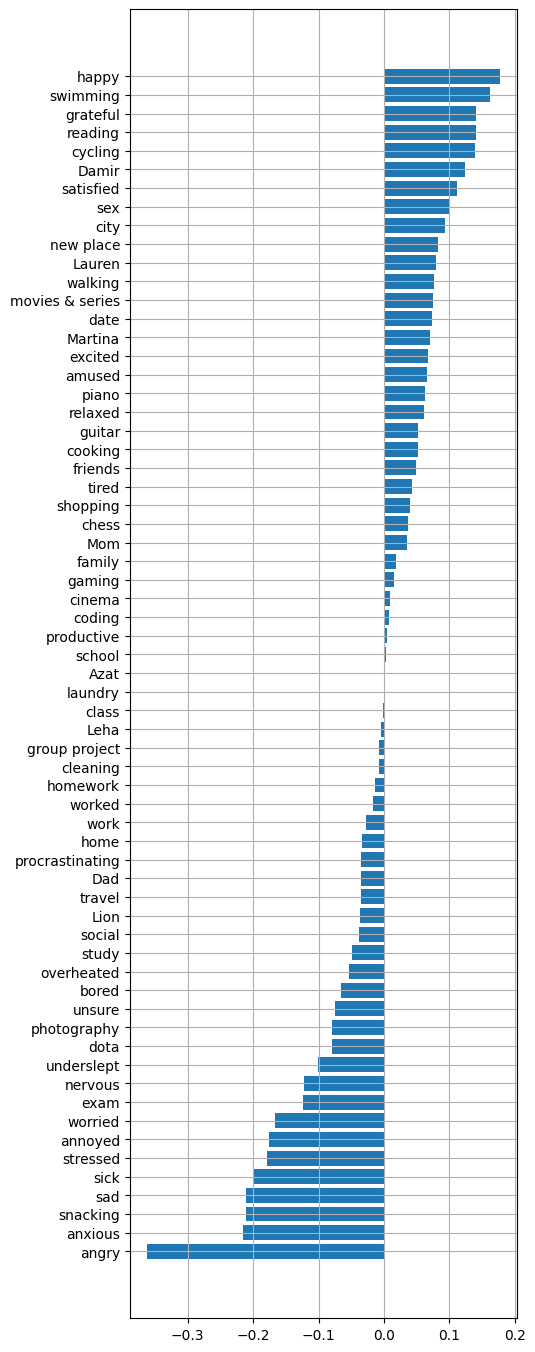

In [7]:
# horisontal bar plot
fig, ax = plt.subplots(figsize=(5, 17))
ax.barh(list(ACTIVITIES.keys())[::-1], weights[::-1])
plt.grid()
plt.show()

In [9]:
import cvxpy as cp
import numpy as np

In [10]:
weights_np = np.array(weights)


In [11]:
weights_np

array([ 1.76952235e-01,  1.62166235e-01,  1.40904664e-01,  1.40702656e-01,
        1.39033881e-01,  1.24330304e-01,  1.11333373e-01,  1.01562684e-01,
        9.32982821e-02,  8.19232127e-02,  7.88160616e-02,  7.58547009e-02,
        7.45487895e-02,  7.28755476e-02,  7.01105329e-02,  6.74414006e-02,
        6.64990834e-02,  6.22920939e-02,  6.09211591e-02,  5.26856849e-02,
        5.19911075e-02,  4.88723066e-02,  4.23935091e-02,  3.94324369e-02,
        3.60899822e-02,  3.55185571e-02,  1.86270263e-02,  1.50685944e-02,
        8.69416249e-03,  7.64067756e-03,  4.12890993e-03,  2.65858586e-03,
        2.29541929e-03, -1.02986612e-04, -1.97278108e-03, -5.19731623e-03,
       -7.35700917e-03, -7.35700917e-03, -1.32845591e-02, -1.70785346e-02,
       -2.80910133e-02, -3.29543508e-02, -3.47861019e-02, -3.52860569e-02,
       -3.54866494e-02, -3.65248227e-02, -3.78276269e-02, -4.88502834e-02,
       -5.29729730e-02, -6.50522643e-02, -7.44001458e-02, -7.92549775e-02,
       -7.98768181e-02, -